In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [3]:
train = pd.read_csv('/kaggle/input/playground-series-s5e7/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s5e7/test.csv')

In [4]:
print("Train shape:", train.shape)
print("Test shape:", test.shape)
print("\nTrain columns:\n", train.columns)
print("\nTrain info:")
train.info()

Train shape: (18524, 9)
Test shape: (6175, 8)

Train columns:
 Index(['id', 'Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency', 'Personality'],
      dtype='object')

Train info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  object 
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  object 
 6   Friends_circle_size        17470 non-null  float64
 7   Post_frequency             17260 non-null  float64
 8   Personality                18524 non-n

In [5]:
print("\nMissing values in train:\n", train.isnull().sum())
print("\nMissing values in test:\n", test.isnull().sum())


Missing values in train:
 id                              0
Time_spent_Alone             1190
Stage_fear                   1893
Social_event_attendance      1180
Going_outside                1466
Drained_after_socializing    1149
Friends_circle_size          1054
Post_frequency               1264
Personality                     0
dtype: int64

Missing values in test:
 id                             0
Time_spent_Alone             425
Stage_fear                   598
Social_event_attendance      397
Going_outside                466
Drained_after_socializing    432
Friends_circle_size          350
Post_frequency               408
dtype: int64


In [6]:
print("\nTrain describe:\n", train.describe())


Train describe:
                  id  Time_spent_Alone  Social_event_attendance  Going_outside  \
count  18524.000000      17334.000000             17344.000000   17058.000000   
mean    9261.500000          3.137764                 5.265106       4.044319   
std     5347.562529          3.003786                 2.753359       2.062580   
min        0.000000          0.000000                 0.000000       0.000000   
25%     4630.750000          1.000000                 3.000000       3.000000   
50%     9261.500000          2.000000                 5.000000       4.000000   
75%    13892.250000          4.000000                 8.000000       6.000000   
max    18523.000000         11.000000                10.000000       7.000000   

       Friends_circle_size  Post_frequency  
count         17470.000000    17260.000000  
mean              7.996737        4.982097  
std               4.223484        2.879139  
min               0.000000        0.000000  
25%               5.000000 


Target distribution:
 Personality
Extrovert    13699
Introvert     4825
Name: count, dtype: int64


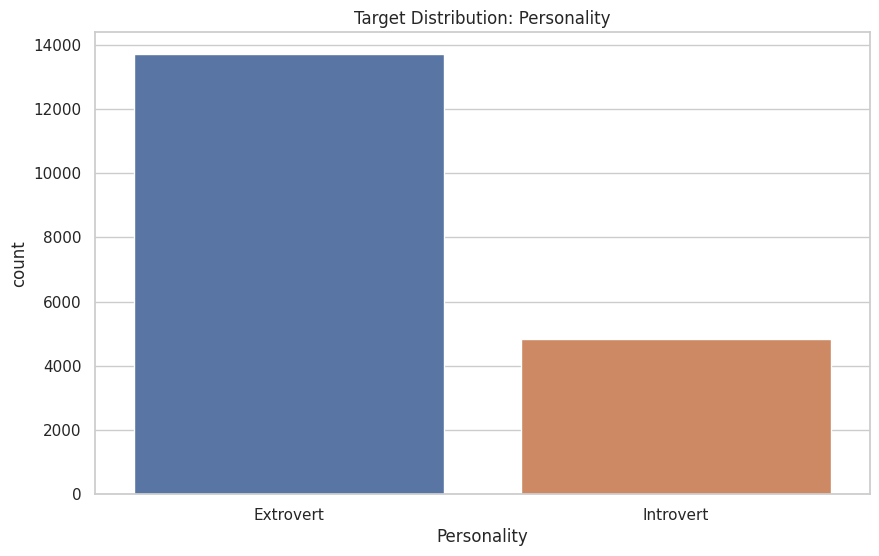

In [7]:
print("\nTarget distribution:\n", train['Personality'].value_counts())
sns.countplot(data=train, x='Personality')
plt.title('Target Distribution: Personality')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


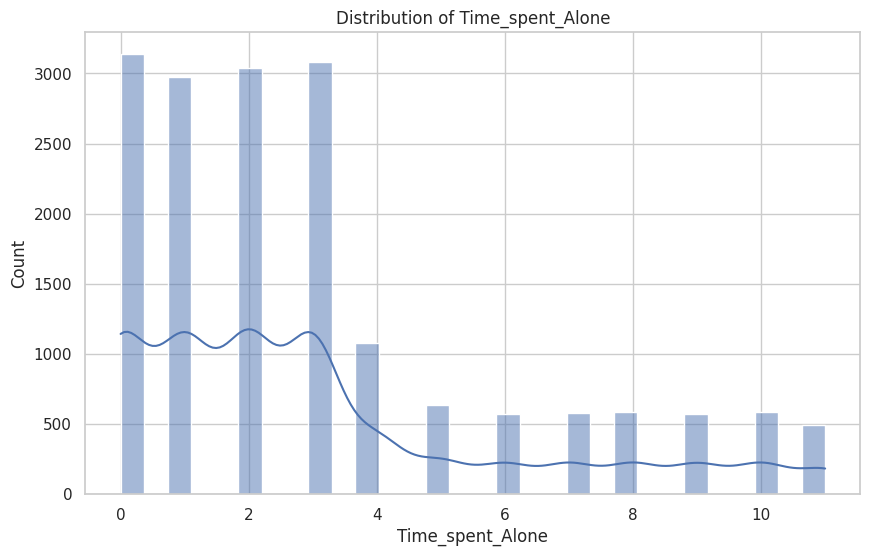

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


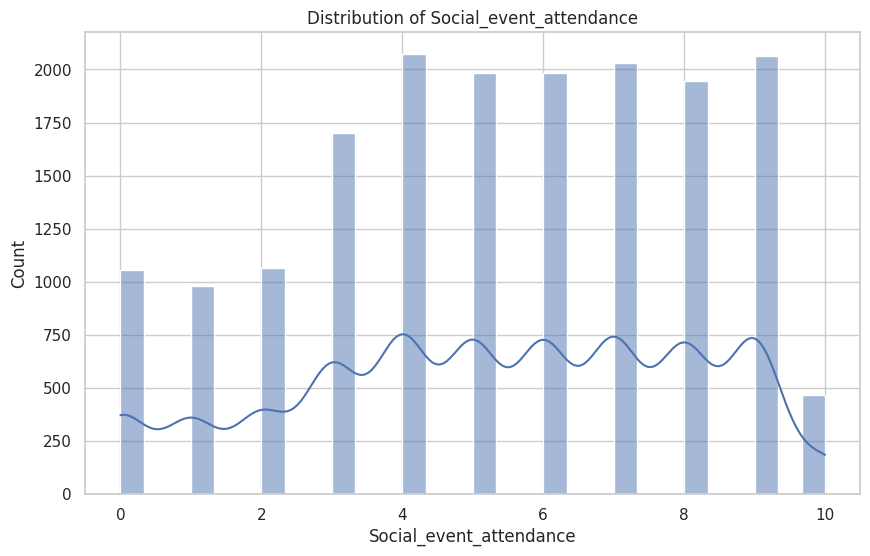

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


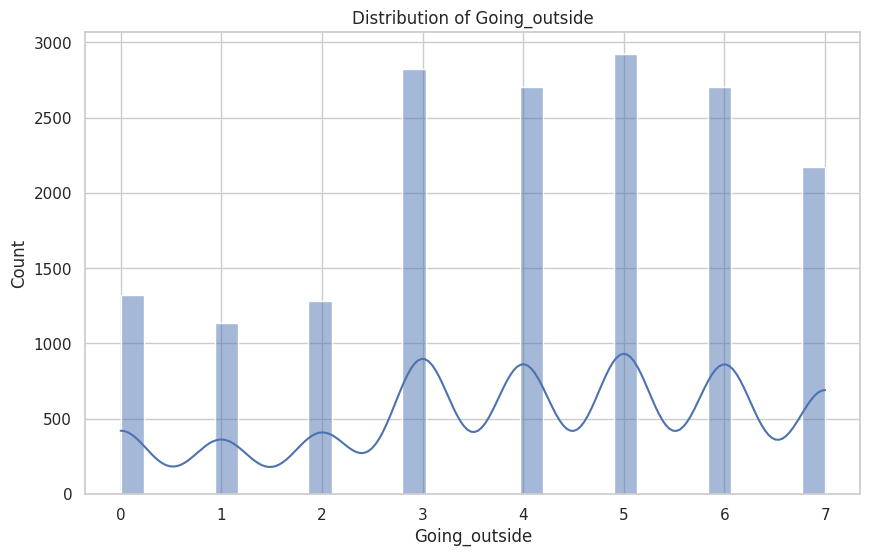

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


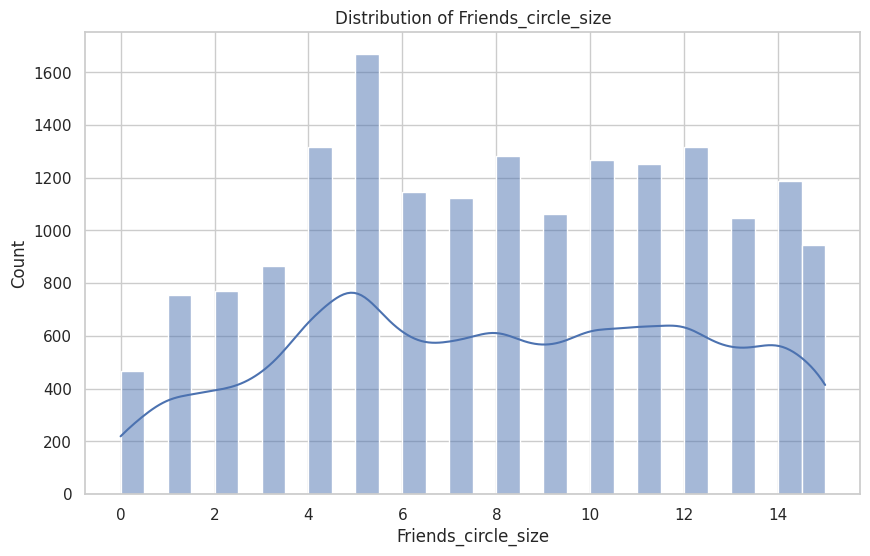

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


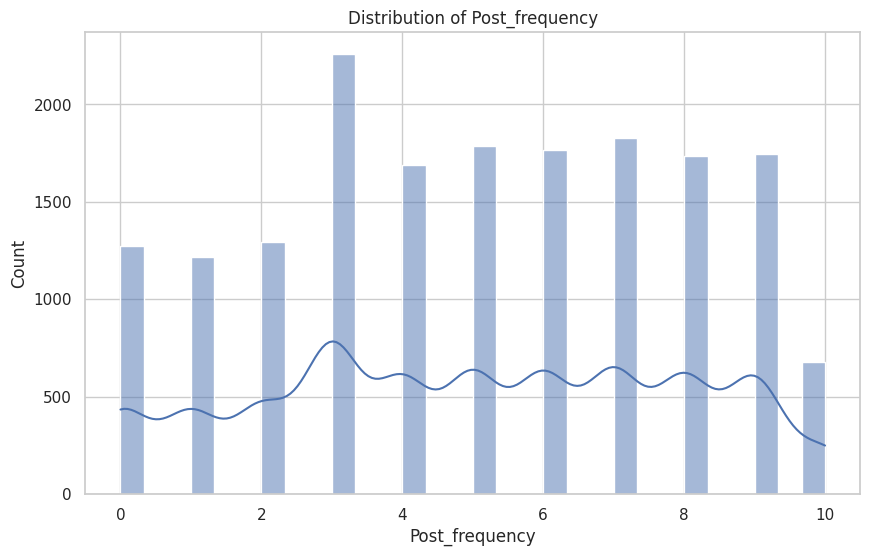

In [8]:
numeric_features = train.select_dtypes(include=['float64', 'int64']).columns.drop(['id'])
for col in numeric_features:
    sns.histplot(train[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

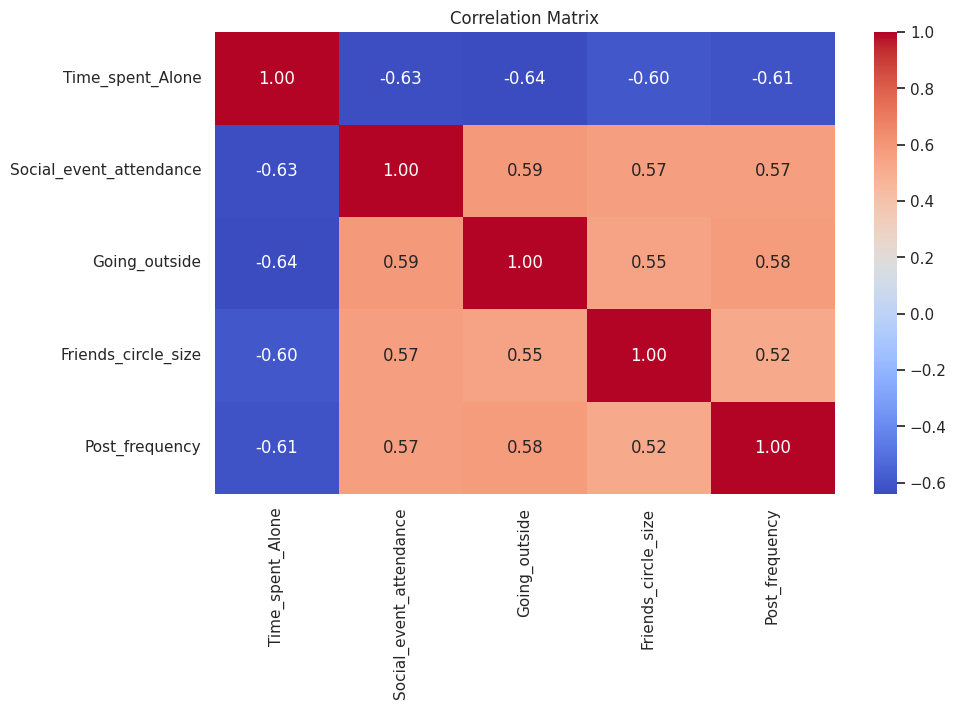

In [9]:
corr_matrix = train[numeric_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

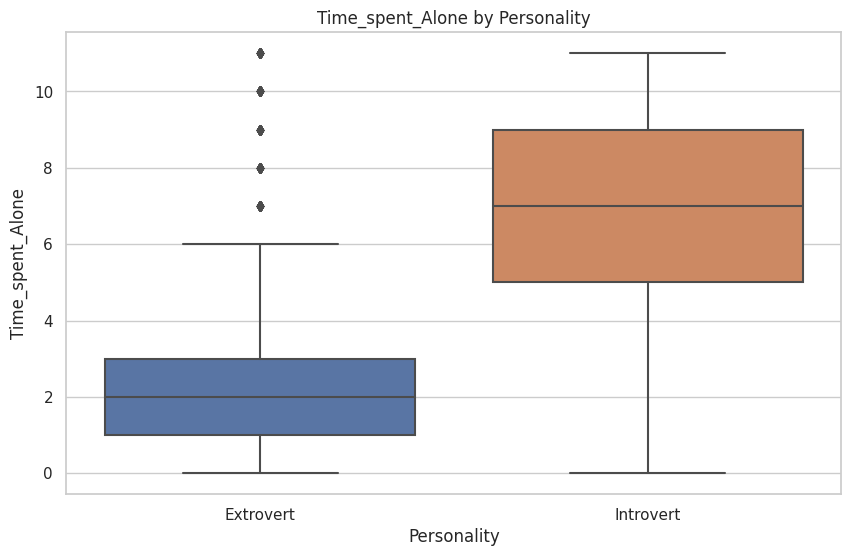

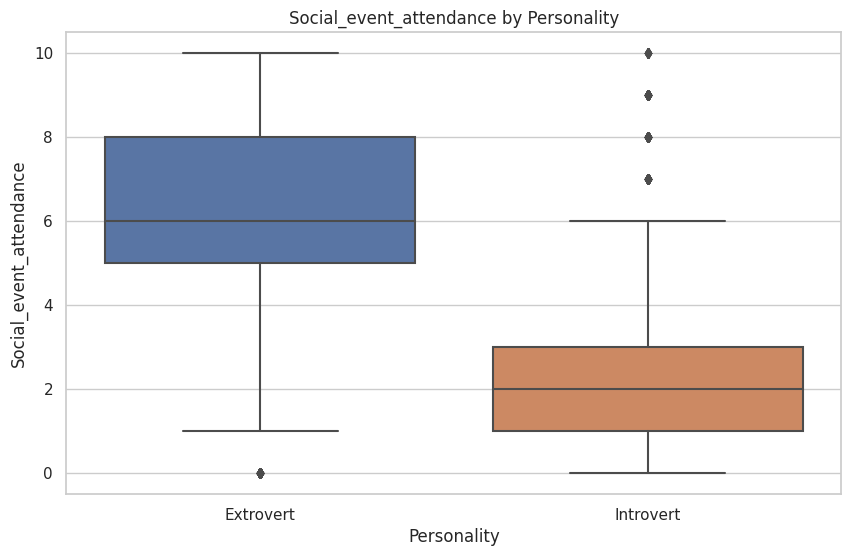

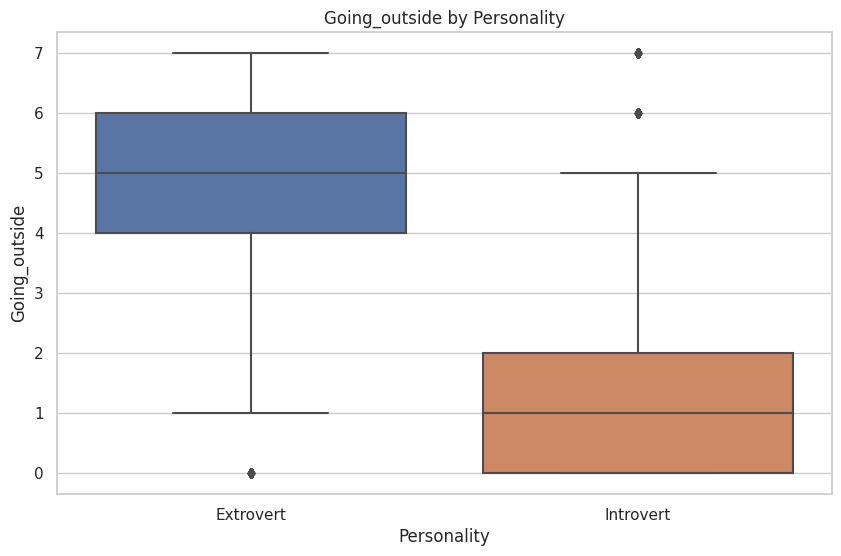

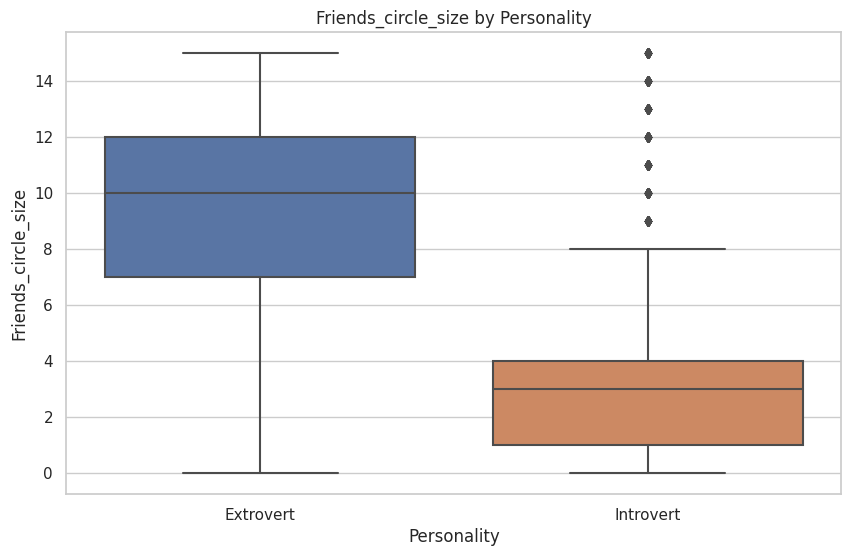

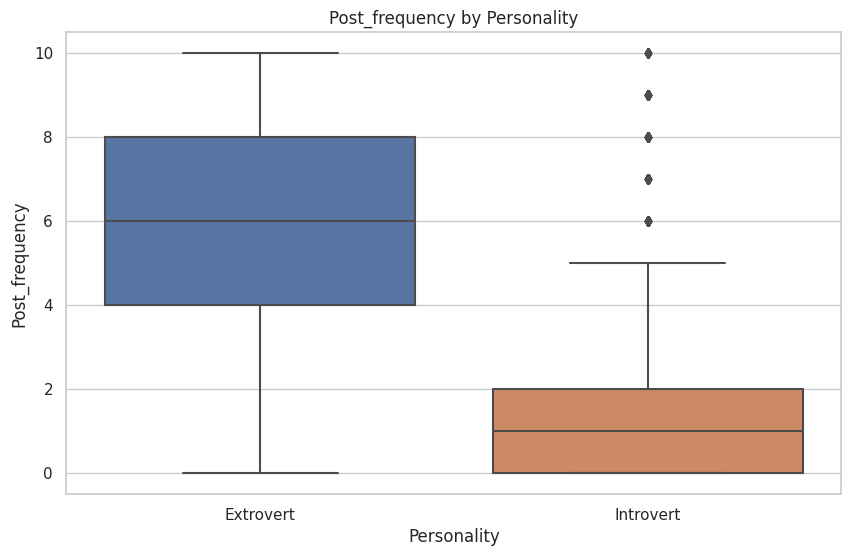

In [10]:
for col in numeric_features:
    sns.boxplot(data=train, x='Personality', y=col)
    plt.title(f'{col} by Personality')
    plt.show()

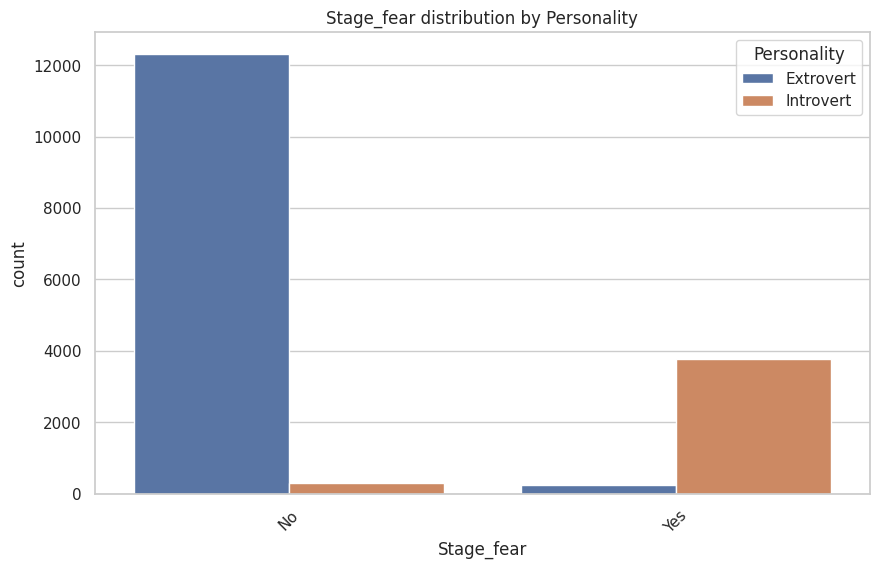

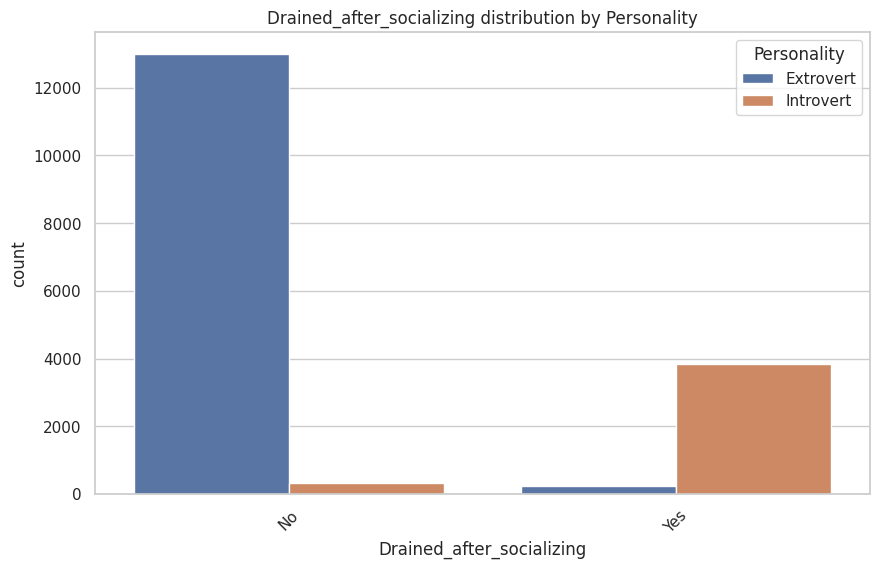

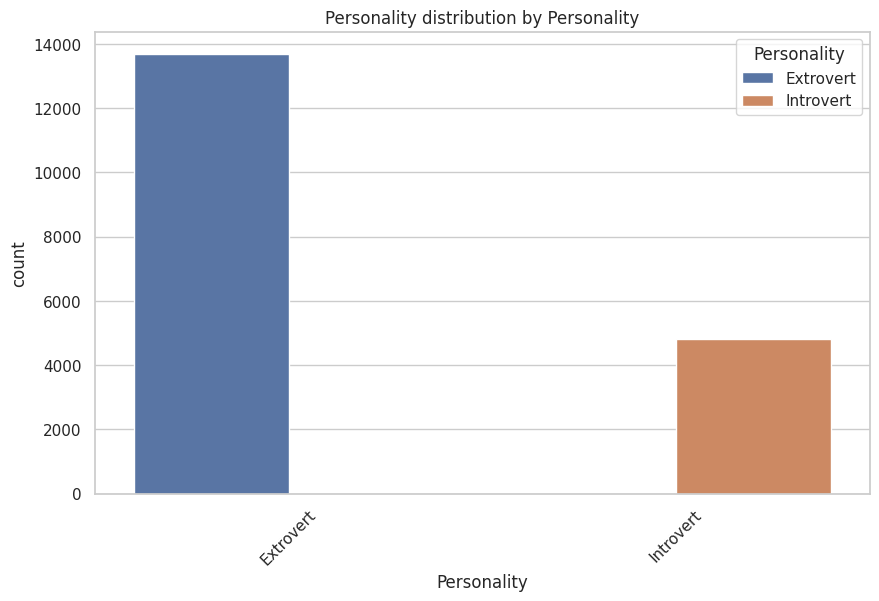

In [11]:
categorical_features = train.select_dtypes(include=['object', 'bool']).columns
for col in categorical_features:
    sns.countplot(data=train, x=col, hue='Personality')
    plt.title(f'{col} distribution by Personality')
    plt.xticks(rotation=45)
    plt.show()